## 1.Import Libraries & Load Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

In [54]:
df = pd.read_csv("Hospital_Patient_Health_Dataset.csv")
df.head()

,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,Insulin,Outcome
0,1,58,Male,27.6,149,147,23.7,0
1,2,48,Male,24.6,130,72,15.8,0
2,3,34,Male,18.3,118,70,18.0,0
3,4,62,Female,21.9,104,74,22.3,1
4,5,27,Female,22.1,134,159,16.4,1


## 2.Exploratory Data Analysis (EDA)

In [63]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())


First 5 rows of the dataset:
   PatientID   Age  Gender   BMI  BloodPressure  GlucoseLevel  Insulin  \
0        1.0  58.0    Male  27.6          149.0         147.0     23.7   
1        2.0  48.0    Male  24.6          130.0          72.0     15.8   
2        3.0  34.0    Male  18.3          118.0          70.0     18.0   
3        4.0  62.0  Female  21.9          104.0          74.0     22.3   
4        5.0  27.0  Female  22.1          134.0         159.0     16.4   

   Outcome  BMI_Category  PatientID  ...  BMI BloodPressure  BMI GlucoseLevel  \
0      0.0           2.0        1.0  ...             4112.4            4057.2   
1      0.0           0.0        2.0  ...             3198.0            1771.2   
2      0.0           3.0        3.0  ...             2159.4            1281.0   
3      1.0           0.0        4.0  ...             2277.6            1620.6   
4      1.0           0.0        5.0  ...             2961.4            3513.9   

   BMI Insulin  BMI BMI_Category  Blood

## 3.Data Preprocessing

In [60]:
# Select all numeric columns regardless of dtype
numerical_columns = df.select_dtypes(include=['number']).columns

# Impute numeric columns with mean
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Select all categorical columns (object or category type)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Impute categorical columns with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])
print(df.head())

   PatientID   Age  Gender   BMI  BloodPressure  GlucoseLevel  Insulin  \
0        1.0  58.0    Male  27.6          149.0         147.0     23.7   
1        2.0  48.0    Male  24.6          130.0          72.0     15.8   
2        3.0  34.0    Male  18.3          118.0          70.0     18.0   
3        4.0  62.0  Female  21.9          104.0          74.0     22.3   
4        5.0  27.0  Female  22.1          134.0         159.0     16.4   

   Outcome  BMI_Category  PatientID  ...  BMI BloodPressure  BMI GlucoseLevel  \
0      0.0           2.0        1.0  ...             4112.4            4057.2   
1      0.0           0.0        2.0  ...             3198.0            1771.2   
2      0.0           3.0        3.0  ...             2159.4            1281.0   
3      1.0           0.0        4.0  ...             2277.6            1620.6   
4      1.0           0.0        5.0  ...             2961.4            3513.9   

   BMI Insulin  BMI BMI_Category  BloodPressure GlucoseLevel  \
0   

In [43]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()


,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,Insulin,Outcome
0,-1.675247,1.053888,1,0.153623,1.425491,0.615049,1.985594,-0.707107
1,-1.559712,0.295695,1,-0.504762,0.435808,-1.393456,0.635276,-0.707107
2,-1.444178,-0.765774,1,-1.887369,-0.189255,-1.447016,1.011314,-0.707107
3,-1.328644,1.357165,0,-1.097308,-0.918496,-1.339896,1.746297,1.414214
4,-1.213110,-1.296509,0,-1.053415,0.644162,0.936410,0.737832,1.414214


In [42]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,Insulin,Outcome
0,-1.675247,1.053888,1,0.153623,1.425491,0.615049,1.985594,-0.707107
1,-1.559712,0.295695,1,-0.504762,0.435808,-1.393456,0.635276,-0.707107
2,-1.444178,-0.765774,1,-1.887369,-0.189255,-1.447016,1.011314,-0.707107
3,-1.328644,1.357165,0,-1.097308,-0.918496,-1.339896,1.746297,1.414214
4,-1.213110,-1.296509,0,-1.053415,0.644162,0.936410,0.737832,1.414214


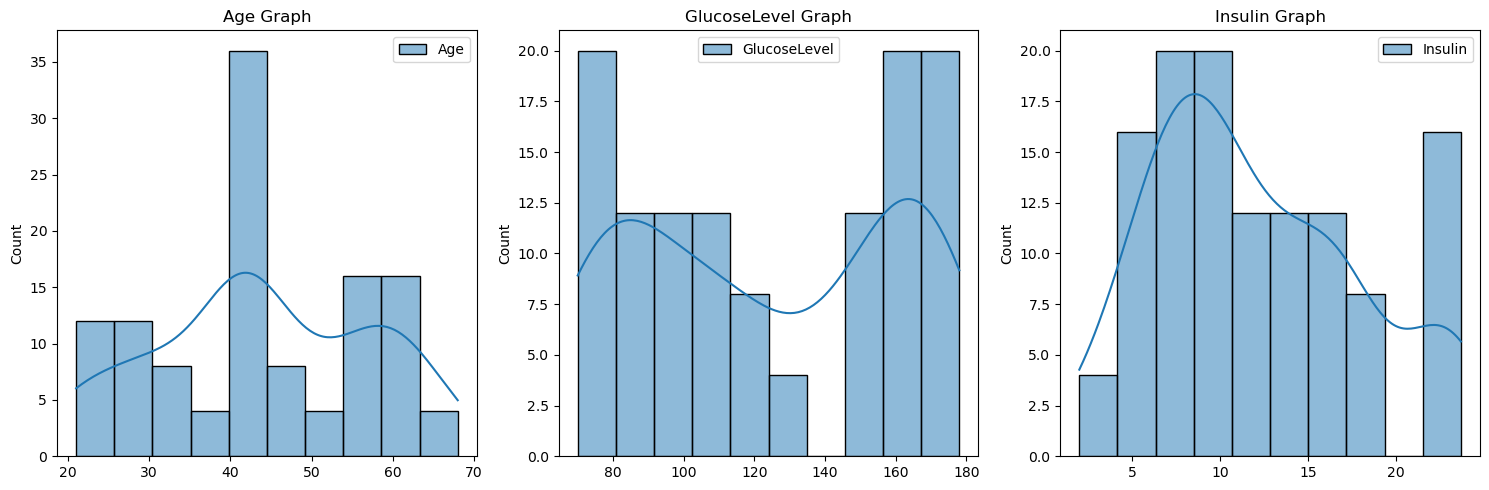

In [65]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title('Age Graph')

plt.subplot(1, 3, 2)
sns.histplot(df['GlucoseLevel'], bins=10, kde=True, color='green')
plt.title('GlucoseLevel Graph')

plt.subplot(1, 3, 3)
sns.histplot(df['Insulin'], bins=10, kde=True, color='red')
plt.title('Insulin Graph')

plt.tight_layout()
plt.show()

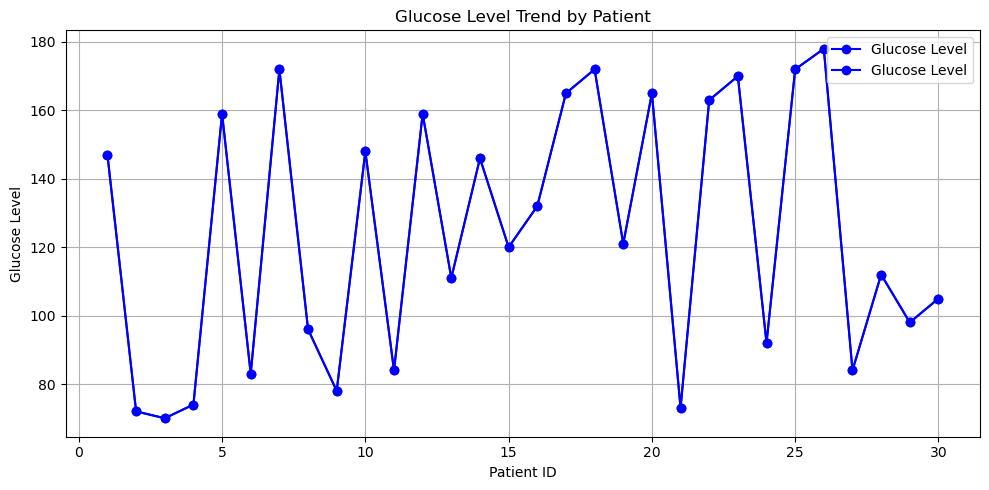

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(df['PatientID'], df['GlucoseLevel'], marker='o', color='blue', label='Glucose Level')

plt.title('Glucose Level Trend by Patient')
plt.xlabel('Patient ID')
plt.ylabel('Glucose Level')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

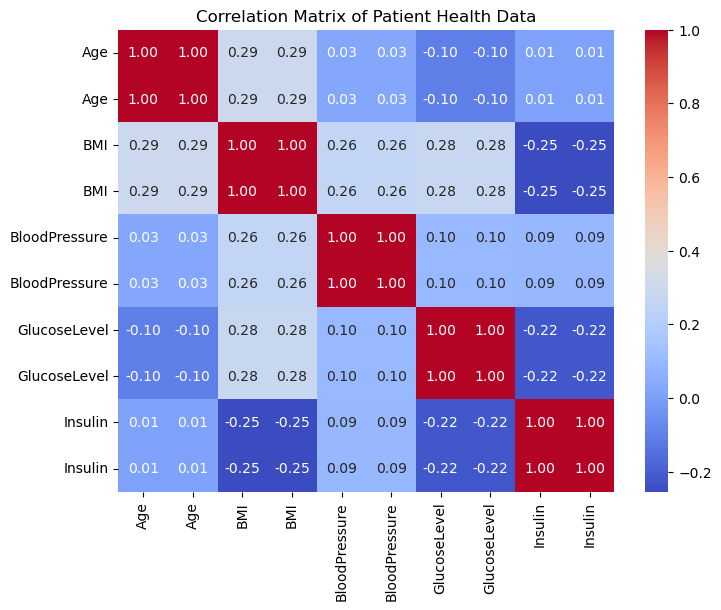

In [74]:
numeric_cols = ['Age', 'BMI', 'BloodPressure', 'GlucoseLevel', 'Insulin']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Patient Health Data')
plt.show()

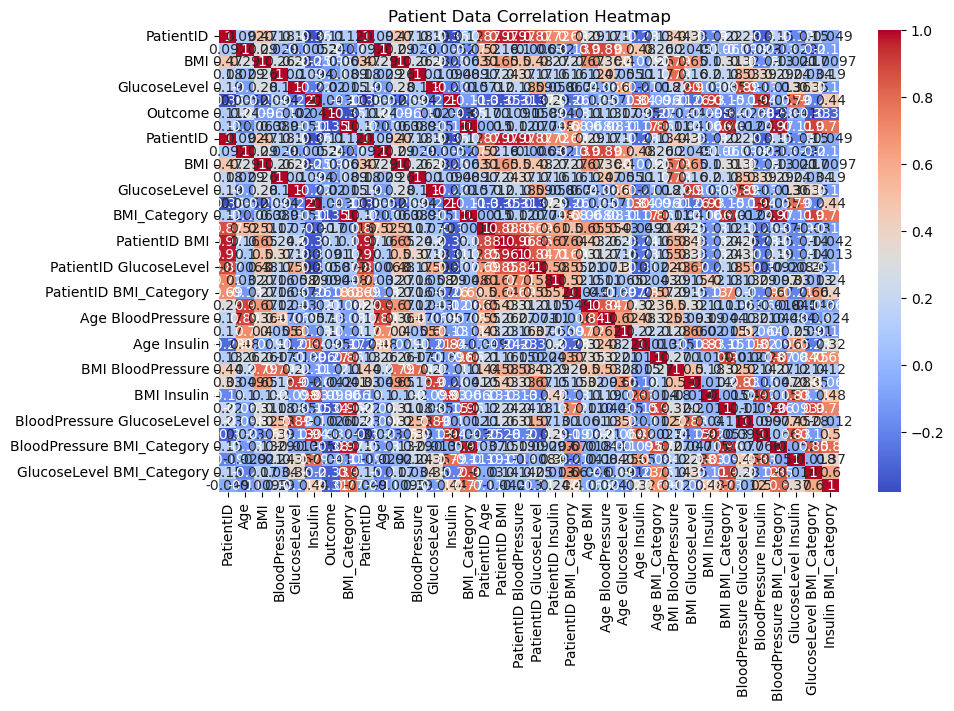

In [75]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Patient Data Correlation Heatmap')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12932\1912815727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='viridis')


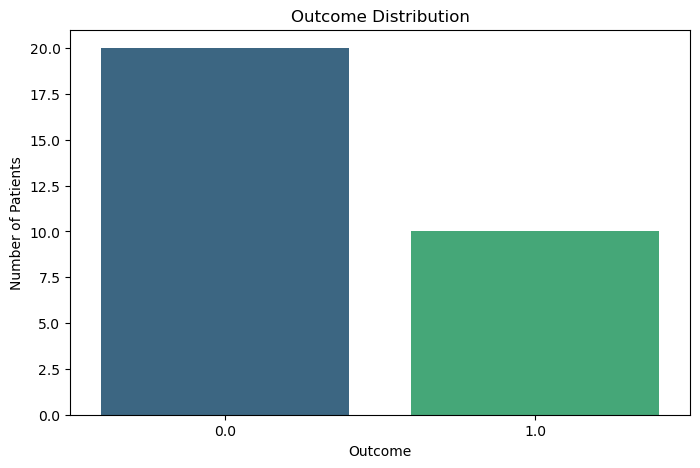

In [76]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outcome', palette='viridis')
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.show()

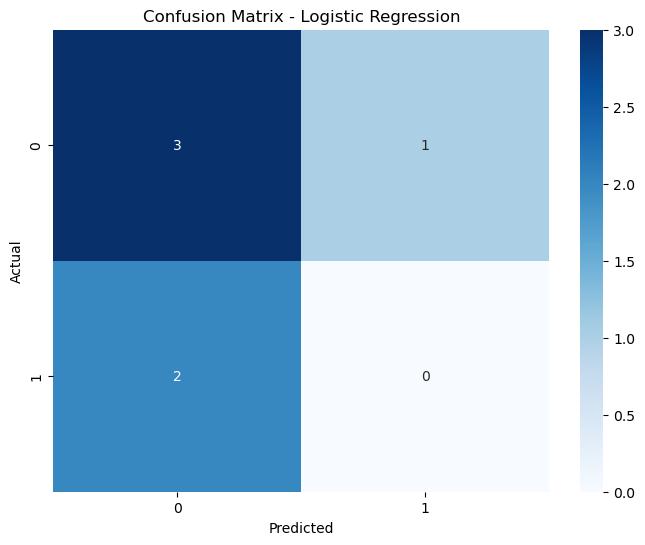

Accuracy: 0.5


NameError: name 'classification_report' is not defined

In [77]:
X = df[['Age', 'BMI', 'BloodPressure', 'GlucoseLevel', 'Insulin']]
y = df['Outcome']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log_reg = log_reg.predict(X_test)

# Confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


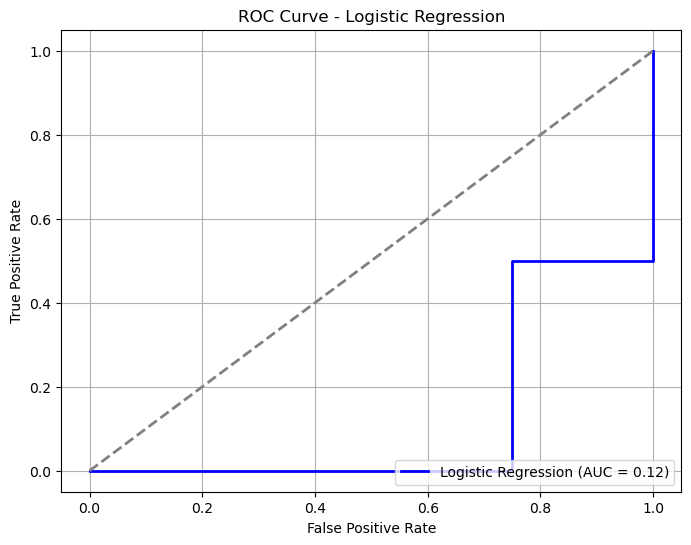

In [78]:
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()